In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import pandas_profiling
import sys,os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas.api.types as ptypes
from numpy.random import choice
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from random import randrange
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import  matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')



import statsmodels.api as sm

## Read the data

In [2]:
df=pd.read_csv('./amit/data.csv')
print(df.columns)
df.head()
df.shape

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


(569, 32)

In [3]:
def load_data():
    df=pd.read_csv('./amit/data.csv')
    df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
    y = df['diagnosis']
    X = df.drop(['diagnosis','id'],axis=1)
    return X,y
X,y =load_data()
feature_cols = X.columns.to_list()


In [4]:
feature_stats = X.describe().T[['mean','std','max','min']]
df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
corr_matrix = df.corr()


In [5]:


model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
ranking_names =map(lambda x: feature_cols[x],fit.ranking_)
print("Feature Ranking: %s" % list(ranking_names))

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True  True False False]
Feature Ranking: ['compactness_mean', 'texture_se', 'perimeter_worst', 'concavity_worst', 'texture_worst', 'symmetry_mean', 'area_mean', 'concave points_mean', 'compactness_se', 'compactness_worst', 'texture_mean', 'fractal_dimension_mean', 'concavity_mean', 'smoothness_se', 'symmetry_worst', 'perimeter_se', 'area_se', 'area_worst', 'smoothness_worst', 'concave points_worst', 'symmetry_se', 'radius_se', 'concave points_se', 'radius_worst', 'fractal_dimension_se', 'perimeter_mean', 'texture_mean', 'texture_mean', 'smoothness_mean', 'concavity_se']


In [6]:
mutual_info = np.array(mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=42))
mutual_info= pd.DataFrame(mutual_info,columns=["mutual_information"],index=feature_cols)
#mutual_info.sort_values(by='mutual_information',ascending=False)\
#        .plot(kind='bar',figsize=(16,9))

In [7]:
X.isnull().sum()


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
from DataCorruption.DataCorruptor import DataCorruptor


In [9]:
    
data_corruptor = DataCorruptor(X,feature_cols)
data_corruptor.get_dataset_with_corrupted_col('radius_mean')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,NaN,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,NaN,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,NaN,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,NaN,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,NaN,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,NaN,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
#implement featureimportances attributes in random forest  to see the importance of a feature 
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(" The RandomForest Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s  (%f)" % (indices[f],feature_cols[indices[f]], importances[indices[f]]))

 The RandomForest Feature ranking:
23. area_worst  (0.145217)
27. concave points_worst  (0.122691)
7. concave points_mean  (0.112253)
22. perimeter_worst  (0.111745)
20. radius_worst  (0.100224)
2. perimeter_mean  (0.056450)
6. concavity_mean  (0.052869)
3. area_mean  (0.050159)
13. area_se  (0.047082)
26. concavity_worst  (0.029087)
1. texture_mean  (0.021063)
21. texture_worst  (0.017346)
0. radius_mean  (0.016625)
10. radius_se  (0.014530)
24. smoothness_worst  (0.011812)
5. compactness_mean  (0.011553)
25. compactness_worst  (0.010770)
28. symmetry_worst  (0.009181)
29. fractal_dimension_worst  (0.008844)
4. smoothness_mean  (0.006856)
12. perimeter_se  (0.006802)
17. concave points_se  (0.006361)
16. concavity_se  (0.004818)
19. fractal_dimension_se  (0.004689)
14. smoothness_se  (0.004454)
18. symmetry_se  (0.004023)
11. texture_se  (0.003684)
15. compactness_se  (0.003344)
9. fractal_dimension_mean  (0.002916)
8. symmetry_mean  (0.002552)


In [11]:
# This function returns you a pippeline for specified features repesentation 
def get_pipeline(X,model=None):
    """Get a sklearn pipeline that is adjusted to the dataset X """ 
    numeric_features = X.select_dtypes(include="number").columns.to_list()
    categorical_features = X.select_dtypes(include="object").columns.to_list()

    if model is None:
        model =LogisticRegression()
    #TODO: Make this funtion parametrisable so it takes numeric/categorical transofmers as parameters 
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    return Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])


top_5_rfe =['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']

top_10_rfe = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst']

top_5_forward=['area_mean', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'fractal_dimension_worst']

top_10_forward=['texture_mean', 'area_mean', 'fractal_dimension_mean', 'symmetry_se', 'texture_worst', 'perimeter_worst', 
                'smoothness_worst', 'compactness_worst', 'concavity_worst', 'fractal_dimension_worst']


top_5_backward=['radius_mean', 'concave points_se', 'texture_worst', 'perimeter_worst', 'smoothness_worst']

top_5_error_ranking= ['texture_mean','radius_mean','perimeter_mean','area_mean','fractal_dimension_mean']
top_10_error_ranking= ['texture_mean','radius_mean','perimeter_mean','area_mean','fractal_dimension_mean',
                       'compactness_mean','smoothness_mean','concave points_mean','concavity_mean','symmetry_mean']


clf = get_pipeline(X)
clf_rfe = get_pipeline(X[top_5_rfe])
clf_rfe_top10 = get_pipeline(X[top_10_rfe])

clf_forward = get_pipeline(X[top_5_forward])
clf_forward_top10 = get_pipeline(X[top_10_forward])

clf_backward = get_pipeline(X[top_5_backward])

clf_rfe_top5_error = get_pipeline(X[top_5_error_ranking])
clf_rfe_top10_error = get_pipeline(X[top_10_error_ranking])


In [12]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


X_test_rfe, X_train_rfe =X_test[top_5_rfe],X_train[top_5_rfe]

X_test_forward, X_train_forward =X_test[top_5_forward],X_train[top_5_forward]
X_test_backward, X_train_backward =X_test[top_5_backward],X_train[top_5_backward]

X_test_5_error, X_train_5_error =X_test[top_5_error_ranking],X_train[top_5_error_ranking]
X_test_10_error, X_train_10_error =X_test[top_10_error_ranking],X_train[top_10_error_ranking]


In [13]:
##forward feature selection 
sfs_top5=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=5, 
        forward=True, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    6.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.8s finished

[2020-07-07 21:22:12] Features: 1/5 -- score: 0.8988705170004657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    4.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    5.6s finished

[2020-07-07 21:22:18] Features: 2/5 -- score: 0.940556590591523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.4s finished

[2020-07-07 21:22:23] Features: 3/5 -- score: 0.9603516534699581[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27

In [14]:
print('top5 feature by  forward feature selection:',sfs_top5.k_feature_names_)
print('forward section top 5 accuracy score:',sfs_top5.k_score_)

top5 feature by  forward feature selection: ('texture_mean', 'fractal_dimension_mean', 'radius_worst', 'texture_worst', 'concave points_worst')
forward section top 5 accuracy score: 0.9669694146871605


In [15]:
pd.DataFrame.from_dict(sfs_top5.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(27,)","[0.9122807017543859, 0.8947368421052632, 0.903...",0.898871,"(concave points_worst,)",0.0162696,0.0101496,0.00585985
2,"(20, 27)","[0.9649122807017544, 0.9473684210526315, 0.956...",0.940557,"(radius_worst, concave points_worst)",0.0443952,0.0276954,0.0159899
3,"(1, 20, 27)","[0.9824561403508771, 0.956140350877193, 0.9824...",0.960352,"(texture_mean, radius_worst, concave points_wo...",0.040827,0.0254694,0.0147048
4,"(1, 20, 21, 27)","[0.9912280701754386, 0.9649122807017544, 0.973...",0.969182,"(texture_mean, radius_worst, texture_worst, co...",0.0256088,0.0159758,0.00922361
5,"(1, 9, 20, 21, 27)","[0.9912280701754386, 0.9649122807017544, 0.973...",0.966969,"(texture_mean, fractal_dimension_mean, radius_...",0.0307709,0.0191961,0.0110829


In [16]:
##forward feature selection 
sfs_top10=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=10, 
        forward=True, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    4.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.7s finished

[2020-07-07 21:22:39] Features: 1/10 -- score: 0.8988705170004657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    4.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    5.9s finished

[2020-07-07 21:22:45] Features: 2/10 -- score: 0.940556590591523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    4.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.9s finished

[2020-07-07 21:22:51] Features: 3/10 -- score: 0.9603516534699581[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of 

In [17]:
print('top10 feature by forward feature selection:',sfs_top10.k_feature_names_)

print('forward section top 5 accuracy score:',sfs_top10.k_score_)

top10 feature by forward feature selection: ('texture_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'concavity_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'concave points_worst')
forward section top 5 accuracy score: 0.9669500077627697


In [18]:
pd.DataFrame.from_dict(sfs_top10.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(27,)","[0.9122807017543859, 0.8947368421052632, 0.903...",0.898871,"(concave points_worst,)",0.0162696,0.0101496,0.00585985
2,"(20, 27)","[0.9649122807017544, 0.9473684210526315, 0.956...",0.940557,"(radius_worst, concave points_worst)",0.0443952,0.0276954,0.0159899
3,"(1, 20, 27)","[0.9824561403508771, 0.956140350877193, 0.9824...",0.960352,"(texture_mean, radius_worst, concave points_wo...",0.040827,0.0254694,0.0147048
4,"(1, 20, 21, 27)","[0.9912280701754386, 0.9649122807017544, 0.973...",0.969182,"(texture_mean, radius_worst, texture_worst, co...",0.0256088,0.0159758,0.00922361
5,"(1, 9, 20, 21, 27)","[0.9912280701754386, 0.9649122807017544, 0.973...",0.966969,"(texture_mean, fractal_dimension_mean, radius_...",0.0307709,0.0191961,0.0110829
6,"(1, 9, 11, 20, 21, 27)","[0.9912280701754386, 0.956140350877193, 0.9649...",0.964796,"(texture_mean, fractal_dimension_mean, texture...",0.0265069,0.016536,0.00954708
7,"(1, 9, 11, 16, 20, 21, 27)","[0.9912280701754386, 0.9649122807017544, 0.973...",0.966969,"(texture_mean, fractal_dimension_mean, texture...",0.0307709,0.0191961,0.0110829
8,"(1, 9, 11, 16, 20, 21, 24, 27)","[0.9912280701754386, 0.9649122807017544, 0.982...",0.96695,"(texture_mean, fractal_dimension_mean, texture...",0.0380924,0.0237635,0.0137199
9,"(1, 9, 10, 11, 16, 20, 21, 24, 27)","[0.9824561403508771, 0.9649122807017544, 0.982...",0.966969,"(texture_mean, fractal_dimension_mean, radius_...",0.0291203,0.0181663,0.0104883
10,"(1, 9, 10, 11, 16, 18, 20, 21, 24, 27)","[0.9824561403508771, 0.9649122807017544, 0.991...",0.96695,"(texture_mean, fractal_dimension_mean, radius_...",0.0380924,0.0237635,0.0137199


In [19]:
##backward feature selection 
sfs_top_backward=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=5, 
        forward=False, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.7s finished

[2020-07-07 21:23:49] Features: 29/5 -- score: 0.9493867411892564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    6.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    8.5s finished

[2020-07-07 21:23:57] Features: 28/5 -- score: 0.9581780779382083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    5.7s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    7.6s finished

[2020-07-07 21:24:05] Features: 27/5 -- score: 0.9581780779382083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of

In [20]:
print('top feature by  backward feature selection:',sfs_top_backward.k_feature_names_)

print('forward section top 5 accuracy score:',sfs_top_backward.k_score_)

top feature by  backward feature selection: ('texture_mean', 'fractal_dimension_mean', 'texture_worst', 'area_worst', 'concave points_worst')
forward section top 5 accuracy score: 0.9625834497748796


In [21]:
pd.DataFrame.from_dict(sfs_top_backward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9824561403508771, 0.9385964912280702, 0.964...",0.949367,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0430582,0.0268613,0.0155084
29,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9736842105263158, 0.9298245614035088, 0.973...",0.949387,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0393165,0.0245271,0.0141607
28,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.9824561403508771, 0.956140350877193, 0.9649...",0.958178,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0308178,0.0192253,0.0110997
27,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.9824561403508771, 0.956140350877193, 0.9649...",0.958178,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0308178,0.0192253,0.0110997
26,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.9824561403508771, 0.956140350877193, 0.9649...",0.958178,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0308178,0.0192253,0.0110997
25,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.9824561403508771, 0.9649122807017544, 0.964...",0.960371,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0310458,0.0193676,0.0111819
24,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15...","[0.9824561403508771, 0.9649122807017544, 0.964...",0.960371,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0310458,0.0193676,0.0111819
23,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15...","[0.9824561403508771, 0.956140350877193, 0.9649...",0.958178,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0308178,0.0192253,0.0110997
22,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 14, 15, 1...","[0.9824561403508771, 0.9649122807017544, 0.964...",0.960371,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0310458,0.0193676,0.0111819
21,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 15, 16, 1...","[0.9824561403508771, 0.9473684210526315, 0.973...",0.96039,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0292533,0.0182493,0.0105362


In [22]:
clf_rfe_top10_error.fit(X_train_10_error, y_train)

clf_rfe_top5_error.fit(X_train_5_error, y_train)
clf_rfe.fit(X_train_rfe, y_train)
clf_forward.fit(X_train_forward, y_train)
clf_backward.fit(X_train_backward, y_train)

clf.fit(X_train, y_train)


clean_test_baseline= clf.score(X_test, y_test)
print("All featues model score: %.3f" % clean_test_baseline)

clean_test_rfe= clf_rfe.score(X_test_rfe, y_test)
print("RFE selected features  model score: %.3f" % clean_test_rfe)

clean_test_forward= clf_forward.score(X_test_forward, y_test)
print("forward selected features  model score: %.3f" % clean_test_forward)

clean_test_backward= clf_backward.score(X_test_backward, y_test)
print("backward selected features  model score: %.3f" % clean_test_backward)

clean_test_top5_error= clf_rfe_top5_error.score(X_test_5_error, y_test)
print("Top 5 Error exepriemnt featues model score: %.3f" % clean_test_top5_error)

clean_test_top10_error= clf_rfe_top10_error.score(X_test_10_error, y_test)
print("TOp 10 Error exepriemnt featues model score: %.3f" % clean_test_top10_error)

All featues model score: 0.965
RFE selected features  model score: 0.930
forward selected features  model score: 0.974
backward selected features  model score: 0.974
Top 5 Error exepriemnt featues model score: 0.904
TOp 10 Error exepriemnt featues model score: 0.904


In [23]:
data_corruptor = DataCorruptor(X_test,feature_cols,feature_stats)
res_= []

print('Feature Ranking Error')
for idx,column in enumerate(feature_cols):
    corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_col(column), y_test)
    loss = corrupted_score - clean_test_baseline
    res_.append([column,corrupted_score,loss])
    print(column+" model score: %.3f" % corrupted_score)

Feature Ranking Error
radius_mean model score: 0.956
texture_mean model score: 0.982
perimeter_mean model score: 0.965
area_mean model score: 0.947
smoothness_mean model score: 0.947
compactness_mean model score: 0.974
concavity_mean model score: 0.965
concave points_mean model score: 0.956
symmetry_mean model score: 0.956
fractal_dimension_mean model score: 0.956
radius_se model score: 0.956
texture_se model score: 0.956
perimeter_se model score: 0.947
area_se model score: 0.939
smoothness_se model score: 0.947
compactness_se model score: 0.947
concavity_se model score: 0.947
concave points_se model score: 0.947
symmetry_se model score: 0.956
fractal_dimension_se model score: 0.956
radius_worst model score: 0.921
texture_worst model score: 0.921
perimeter_worst model score: 0.886
area_worst model score: 0.807
smoothness_worst model score: 0.798
compactness_worst model score: 0.798
concavity_worst model score: 0.772
concave points_worst model score: 0.693
symmetry_worst model score: 0.

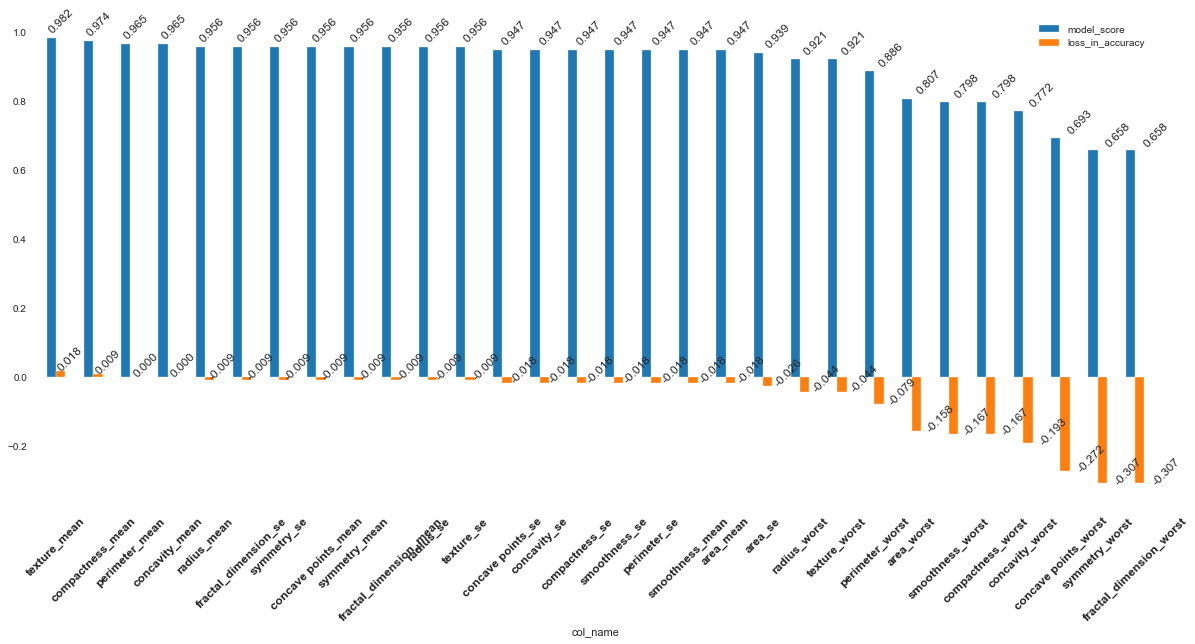

In [24]:
error_feature_ranking= pd.DataFrame(res_,columns=['col_name','model_score','loss_in_accuracy']).sort_values(by='loss_in_accuracy',ascending=False)
plot=error_feature_ranking.set_index('col_name').plot(kind='bar',figsize=(20,9))
plt.xticks(rotation=45,fontsize='large',fontweight='bold')


for p in plot.patches:
    plt.text(*(p.get_x() * 1.015, p.get_height() * 1.015),"%.3f" % float(p.get_height()), rotation=45,fontsize='large')
    #plot.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015))

#disrupted_feature_ranking = pd.concat([pd.DataFrame(res,columns=['feature','score','loss']),] ).sort_values(by='loss',ascending=False).drop('score',axis=1)

In [25]:
def do_experiment(clf,X_test,y_test,feature_cols):
    
    data_corruptor = DataCorruptor(X_test,feature_cols)
    total_cells = X_test.shape[0] * X_test.shape[1]
    res= []
    for n in range(total_cells):
            #print(y_test)
            corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
            res.append([(n/total_cells),corrupted_score])
    df = pd.DataFrame(res,columns=['%Corrupted','Score'])
    
    print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
    return df


In [26]:
experiment_df = do_experiment(clf,X_test,y_test,feature_cols)
expeirment_df_rfe = do_experiment(clf_rfe,X_test_rfe,y_test,top_5_rfe)
expeirment_df_forward = do_experiment(clf_forward,X_test_forward,y_test,top_5_forward)
expeirment_df_backward = do_experiment(clf_backward,X_test_backward,y_test,top_5_backward)
experiment_df_5_error = do_experiment(clf_rfe_top5_error,X_test_5_error,y_test,top_5_error_ranking)
experiment_df_10_error = do_experiment(clf_rfe_top10_error,X_test_10_error,y_test,top_10_error_ranking)

Area under the curve 0.8556055709449062
Area under the curve 0.8381271160357032
Area under the curve 0.8427823945829486
Area under the curve 0.8375346260387811
Area under the curve 0.813911972914743
Area under the curve 0.8040320098491844


- Base case :  0.622609520878219
- RFE :  0.6459449061249616
- Top 5 Error :  0.6499461372730071
- Top 10 Error :  0.710299322868575

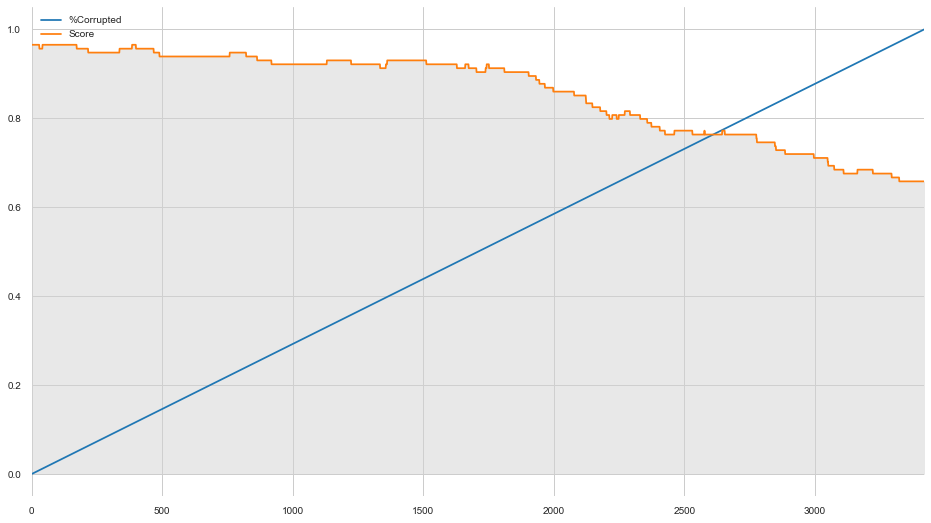

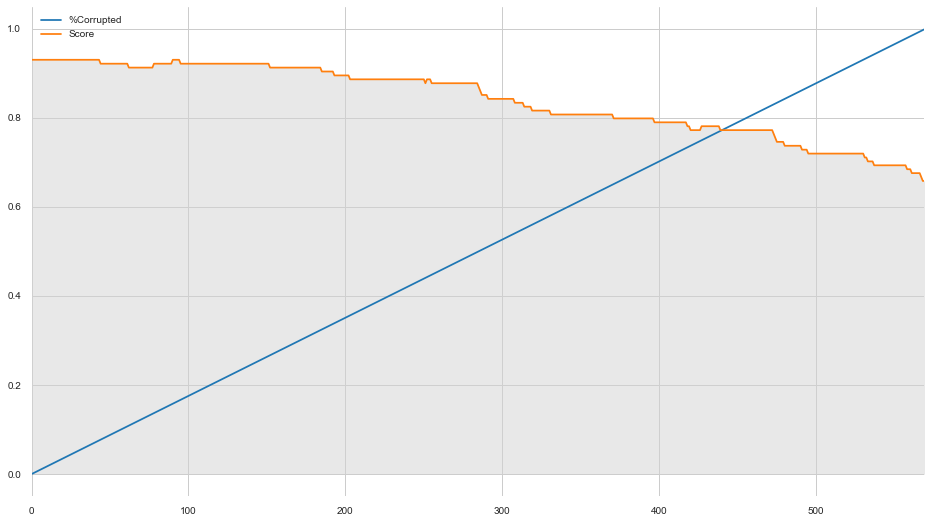

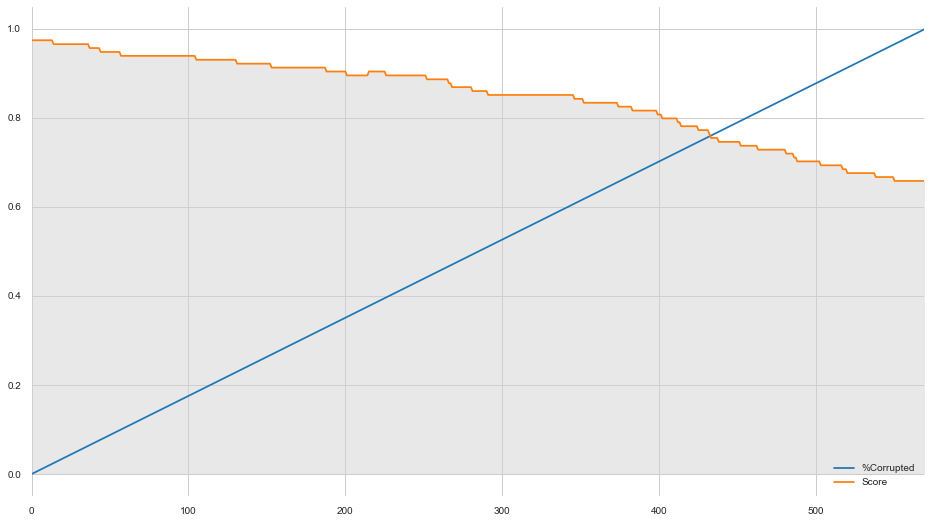

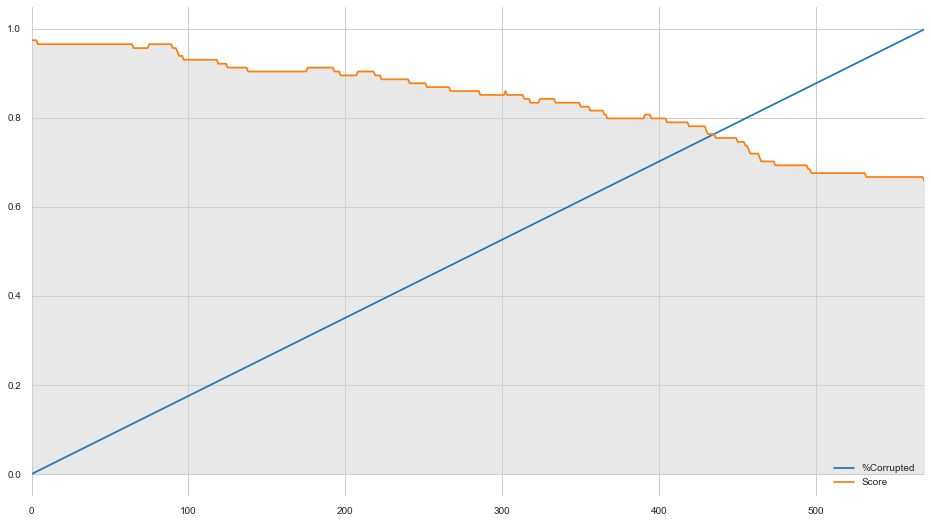

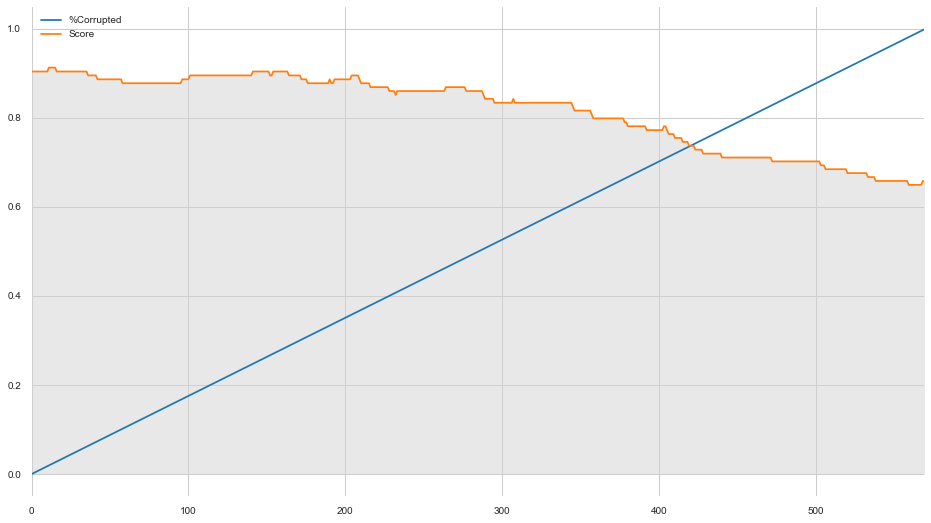

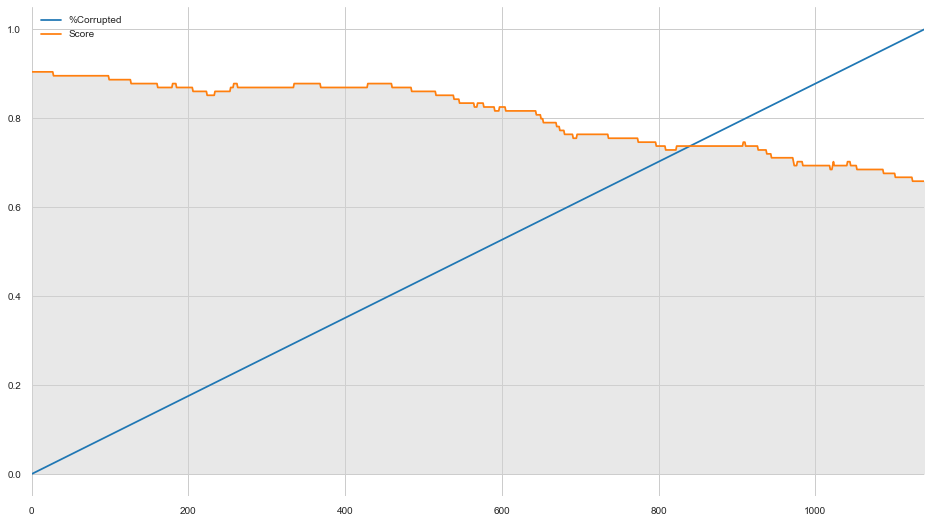

In [27]:
experiment_df.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(experiment_df.index,experiment_df['Score'],color='lightgrey',alpha=0.5)

expeirment_df_rfe.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(expeirment_df_rfe.index,expeirment_df_rfe['Score'],color='lightgrey',alpha=0.5)
expeirment_df_forward.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(expeirment_df_forward.index,expeirment_df_forward['Score'],color='lightgrey',alpha=0.5)
expeirment_df_backward.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(expeirment_df_backward.index,expeirment_df_backward['Score'],color='lightgrey',alpha=0.5)

experiment_df_5_error.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(experiment_df_5_error.index,experiment_df_5_error['Score'],color='lightgrey',alpha=0.5)
experiment_df_10_error.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(experiment_df_10_error.index,experiment_df_10_error['Score'],color='lightgrey',alpha=0.5)

In [28]:

def measure_error_auc(clf,X_test,y_test,feature_cols):

    data_corruptor = DataCorruptor(X_test,feature_cols)
    total_cells = X_test.shape[0] * X_test.shape[1]
    res= []
    for n in range(total_cells):
            corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
            res.append([(n/total_cells),corrupted_score])
    df = pd.DataFrame(res,columns=['%Corrupted','Score'])

    #print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
    return np.trapz(df['Score'],df['%Corrupted'])   

Picking high k for Kfold validation helps to stabilize the scores 

5-fold validation scores
0.6187251411489927
0.6242285033968857
0.6173170104296546
0.6233347466250512
0.6515760685591371

10-Fold Validation scores:
0.6361854497877946
0.6268862124047063
0.6437379181820466
0.6437379181820466
0.6316132032318159
0.6316132032318159